In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
file_path = r"C:\Users\admin\Downloads\archive\Hackathon_Working_Data.csv"
df = pd.read_csv(file_path)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [5]:
df.tail()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN
26984,M3,N10,31,T6013,15.0,1.0,15.0,15.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,SAJ INDS,BISK FARM,BISK FARM JUST GINGER


In [7]:
df.shape

(26985, 14)

In [9]:
df.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [11]:
df.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [13]:
df.nunique()

MONTH           3
STORECODE      10
DAY            31
BILL_ID      6424
BILL_AMT     1453
QTY            45
VALUE         640
PRICE         492
GRP            80
SGRP          174
SSGRP         232
CMP           354
MBRD          643
BRD          1315
dtype: int64

In [15]:
df['DAY'].unique()
#cleaning
df.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


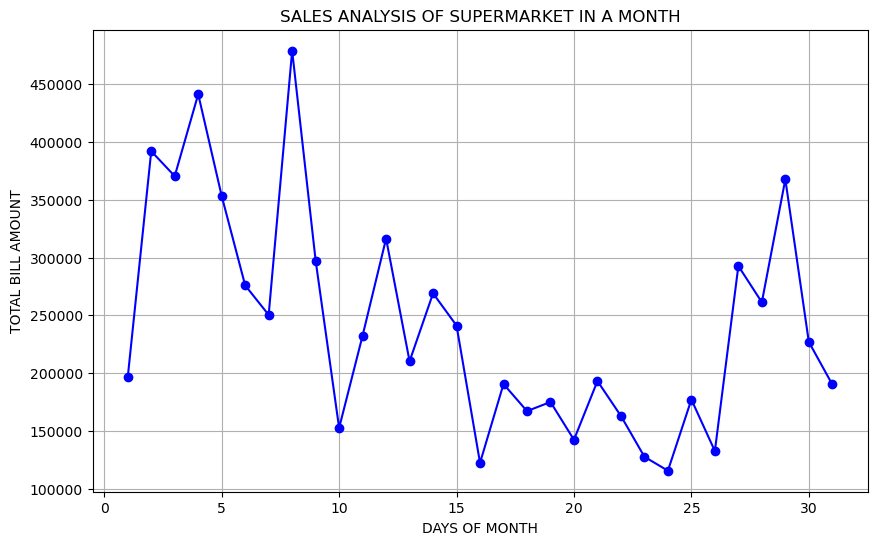

In [19]:
yearly_totals = df.groupby('DAY')['BILL_AMT'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['DAY'], yearly_totals['BILL_AMT'], marker='o', linestyle='-', color='blue')
plt.title('SALES ANALYSIS OF SUPERMARKET IN A MONTH')
plt.xlabel('DAYS OF MONTH')
plt.ylabel('TOTAL BILL AMOUNT')
plt.grid(True)
plt.show()

In [21]:
total_sales_by_category = df.groupby('GRP')['BILL_AMT'].sum().reset_index()

TOP_5_SALES = total_sales_by_category.sort_values(by='BILL_AMT', ascending=False).head(5)

print(TOP_5_SALES)

                              GRP    BILL_AMT
11     BISCUITS - CORE & NON CORE  1169416.53
68                 SPICES (03/04)   516804.72
79        WASHING POWDERS/LIQUIDS   472523.14
52                   PACKAGED TEA   468254.34
57  REFINED EDIBLE OILS-ALL PACKS   377735.27


In [23]:
top_stores_by_company = pd.DataFrame(columns=['STORECODE', 'CMP', 'BILL_AMT'])


unique_storecodes = df['STORECODE'].unique()

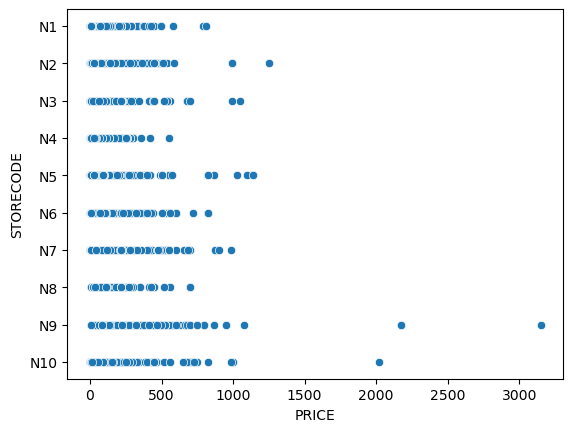

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.scatterplot( x="PRICE", y='STORECODE', data=df, )
plt.show()

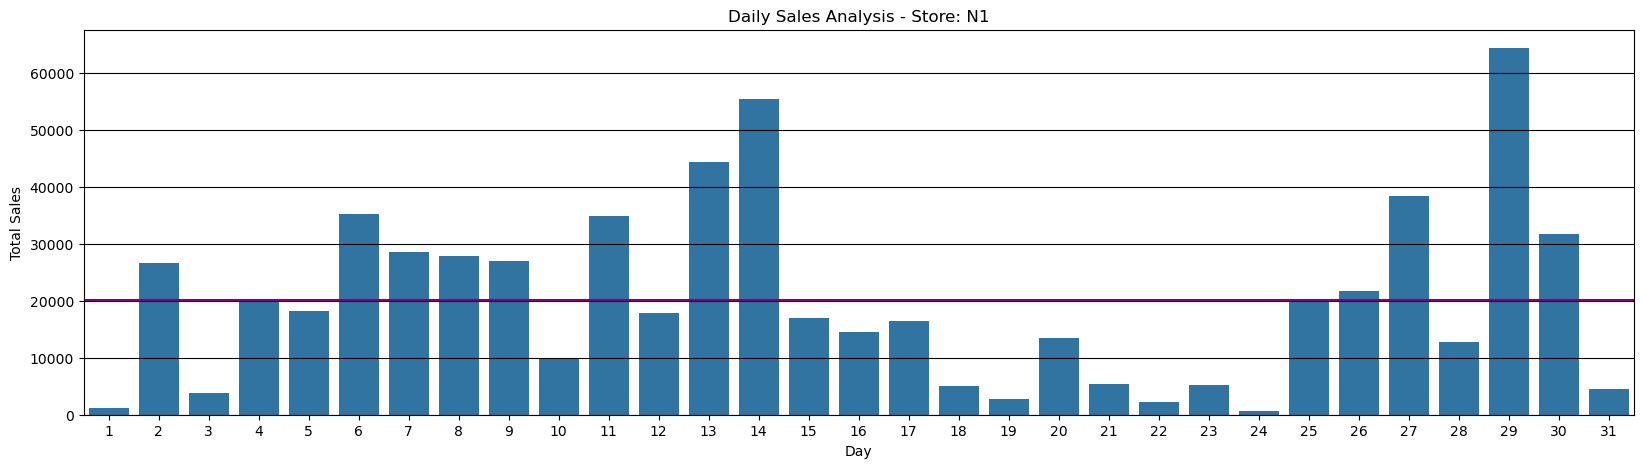

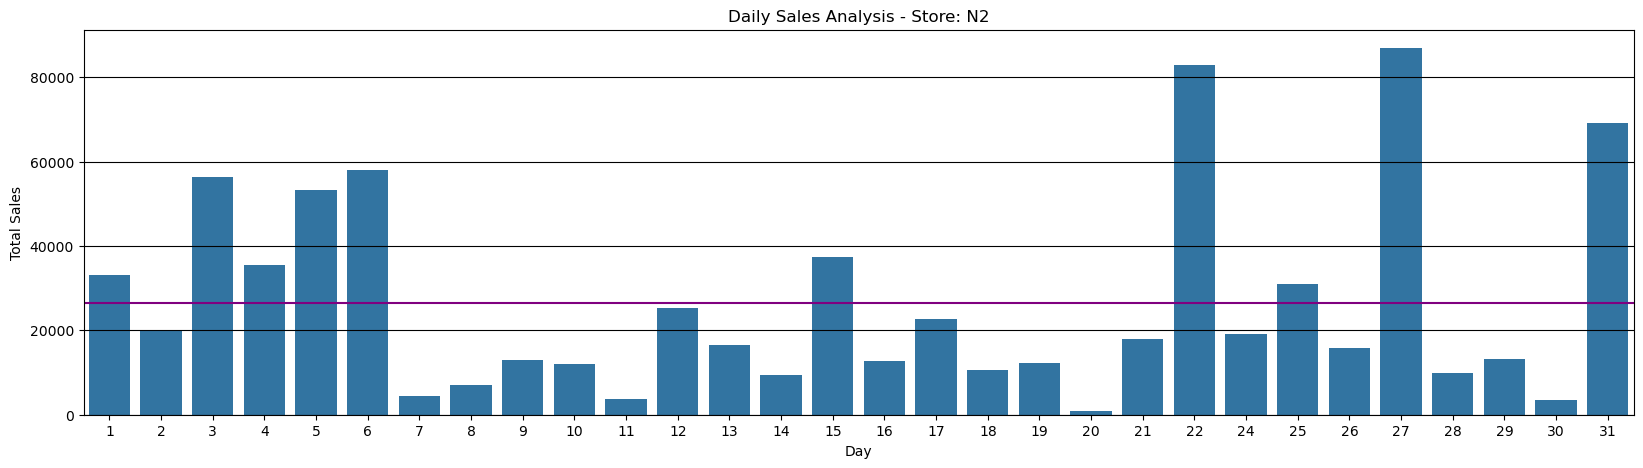

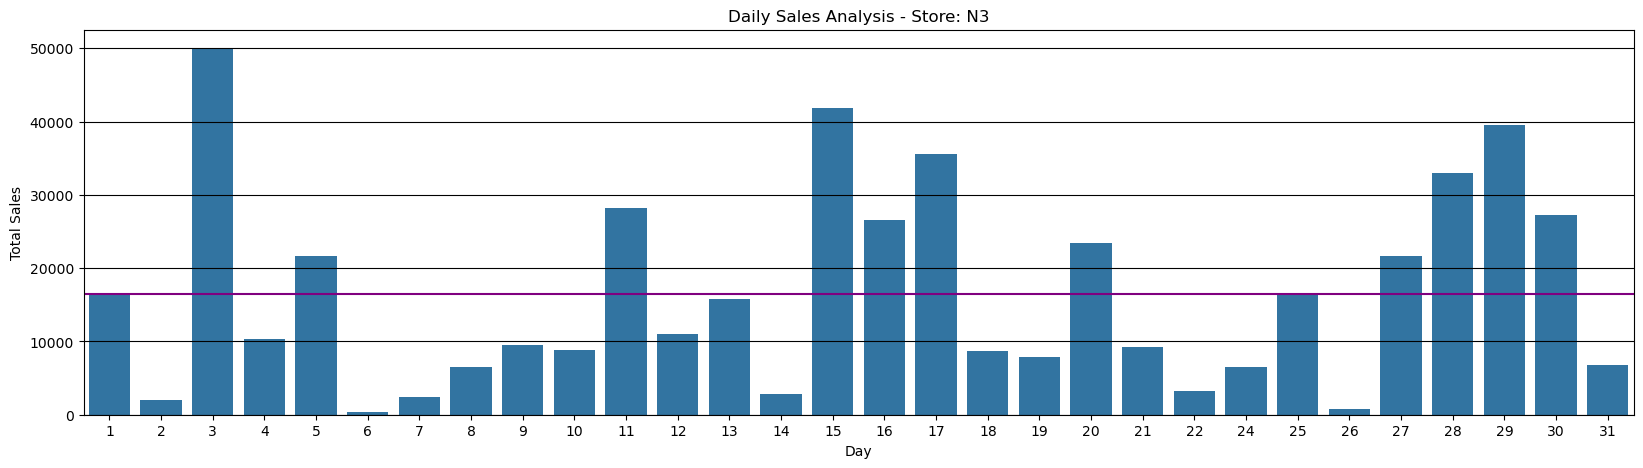

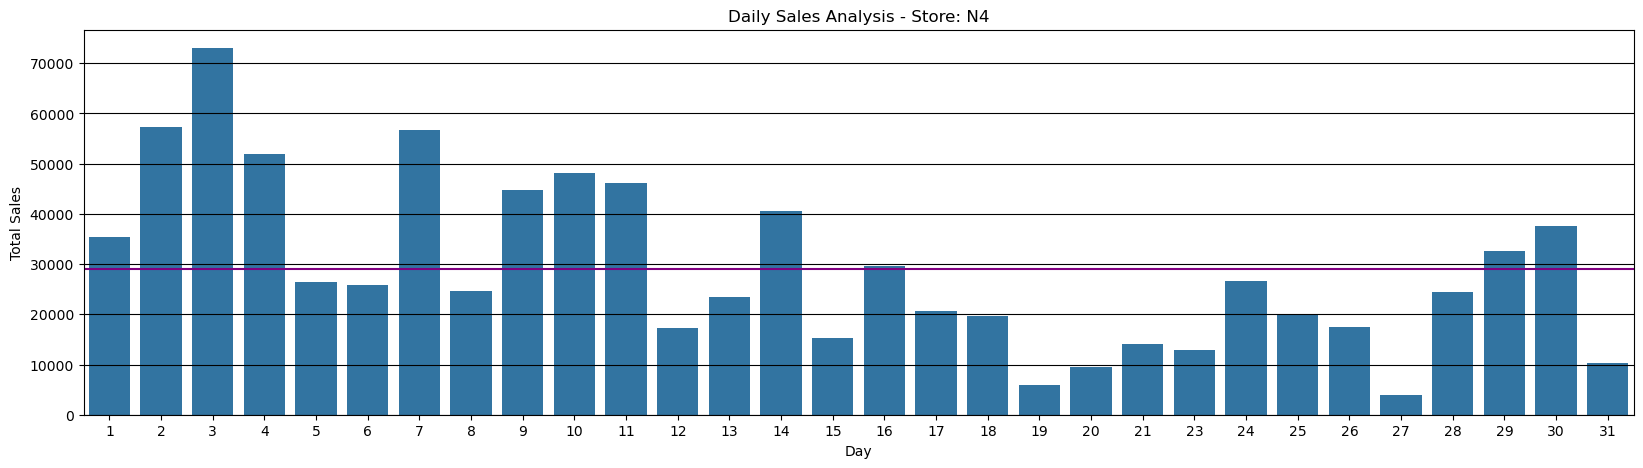

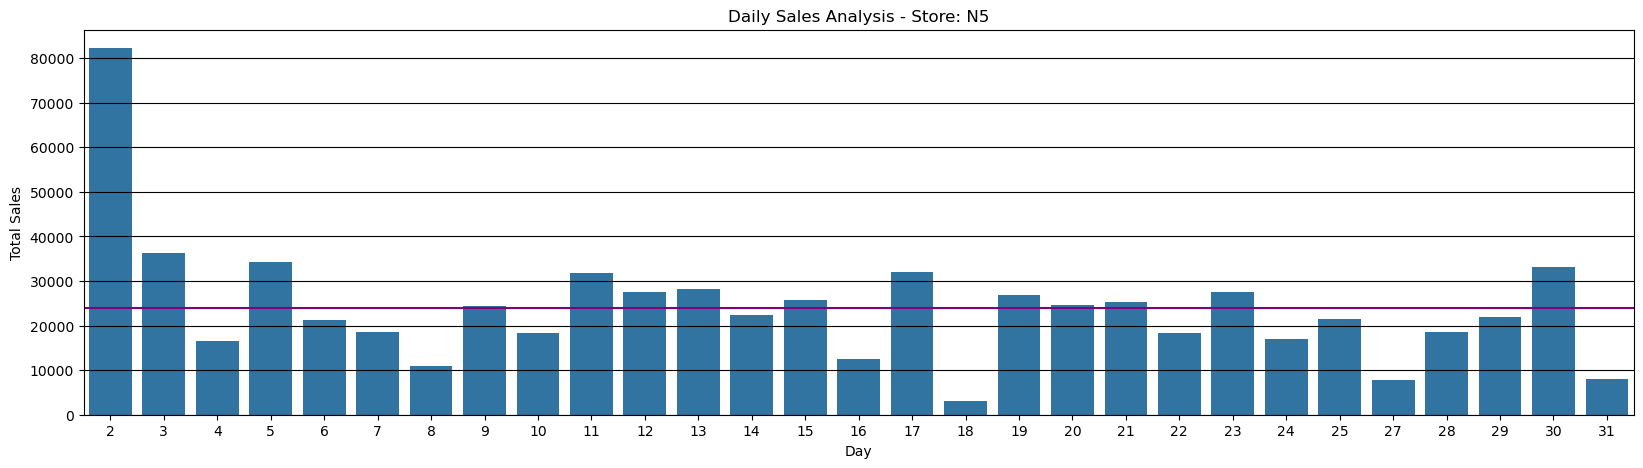

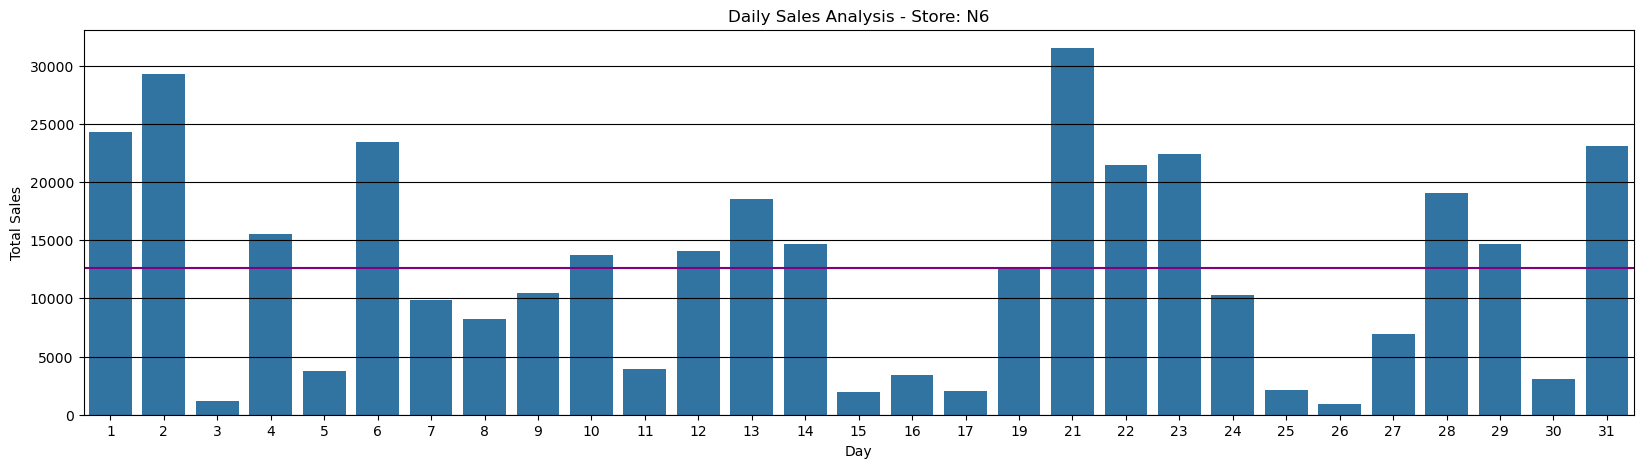

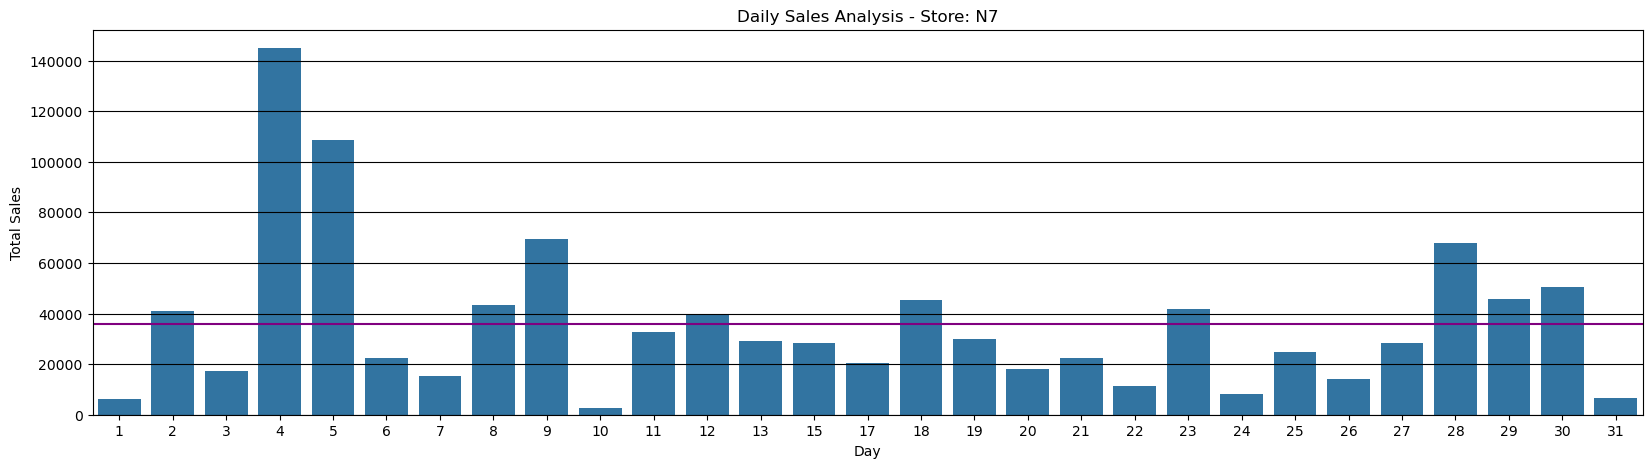

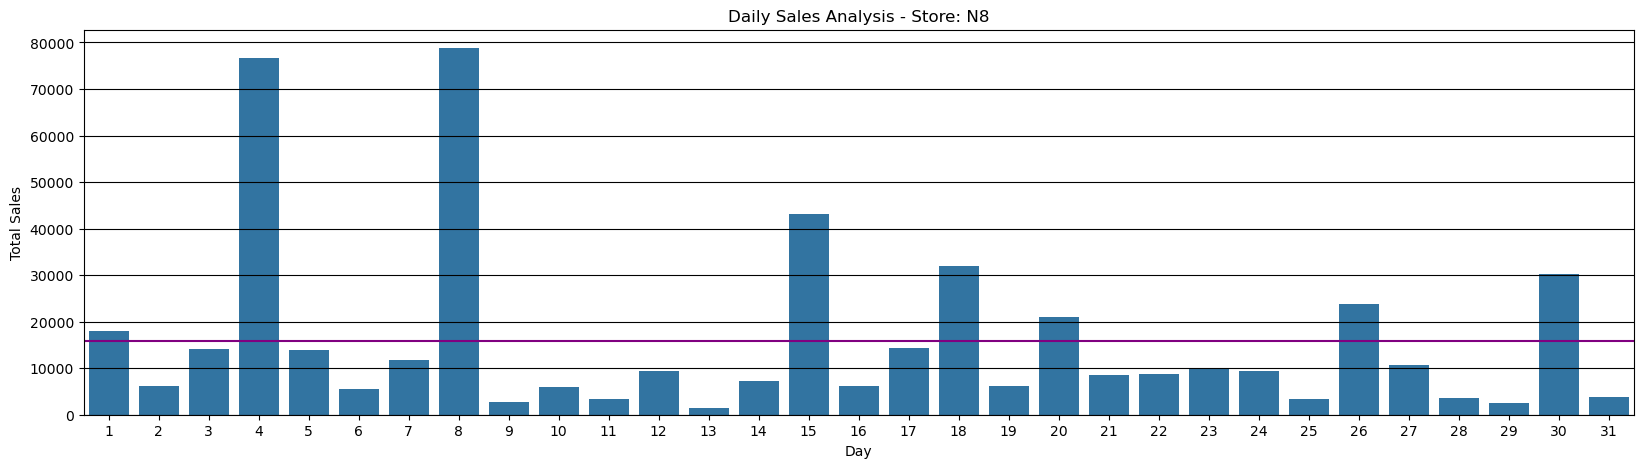

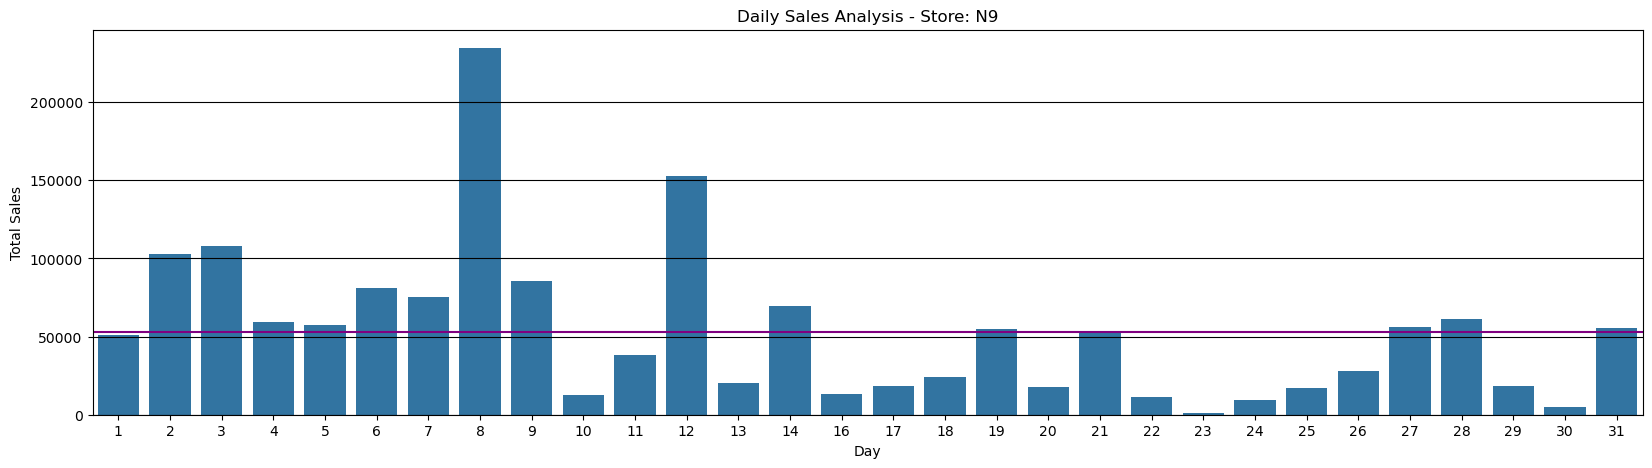

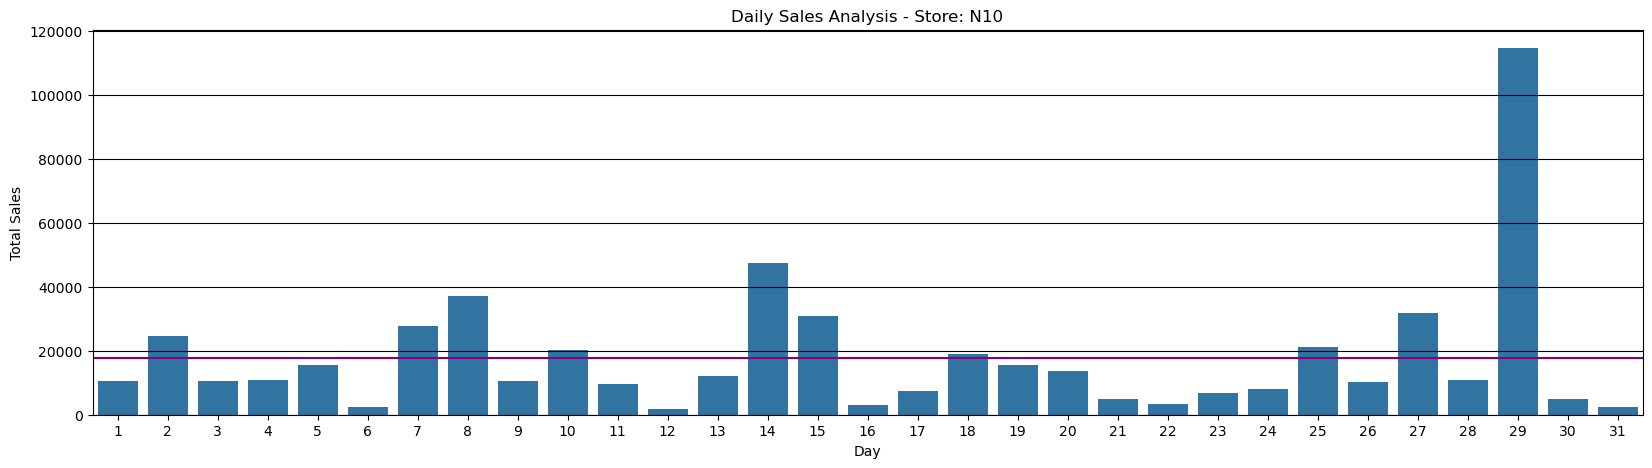

In [27]:
for i, storecode in enumerate(unique_storecodes[:10]): 
    store_data = df[df['STORECODE'] == storecode]
    daily_sales = store_data.groupby("DAY")["BILL_AMT"].sum().reset_index()

    plt.figure(figsize=(20, 5))
    sns.barplot(x=daily_sales['DAY'], y=daily_sales['BILL_AMT']).axhline(daily_sales['BILL_AMT'].mean(), color='purple')
    plt.title("Daily Sales Analysis - Store: " + str(storecode))
    plt.xlabel("Day")
    plt.ylabel("Total Sales")
    plt.grid(axis='y', color='black')
    plt.show()

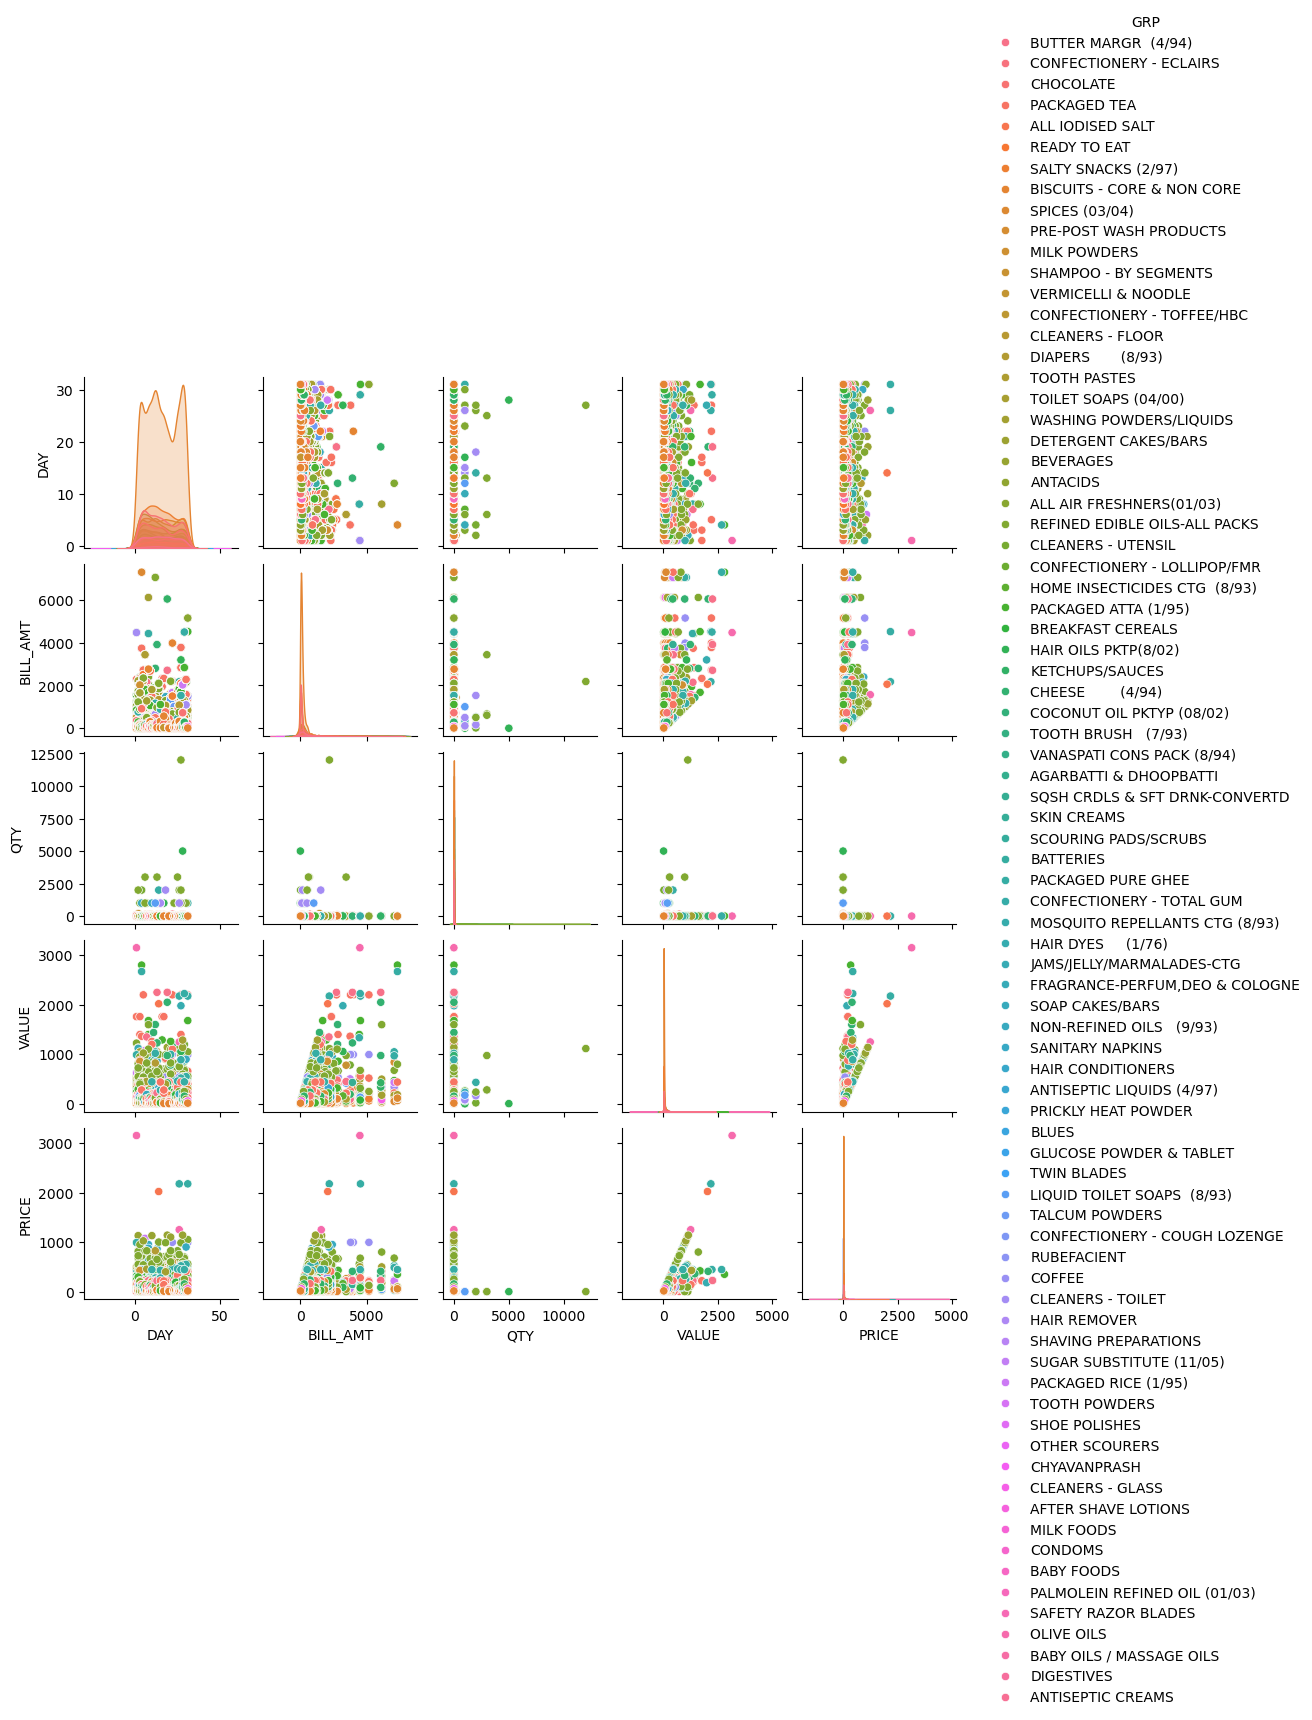

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.pairplot(df, hue='GRP', height=2)

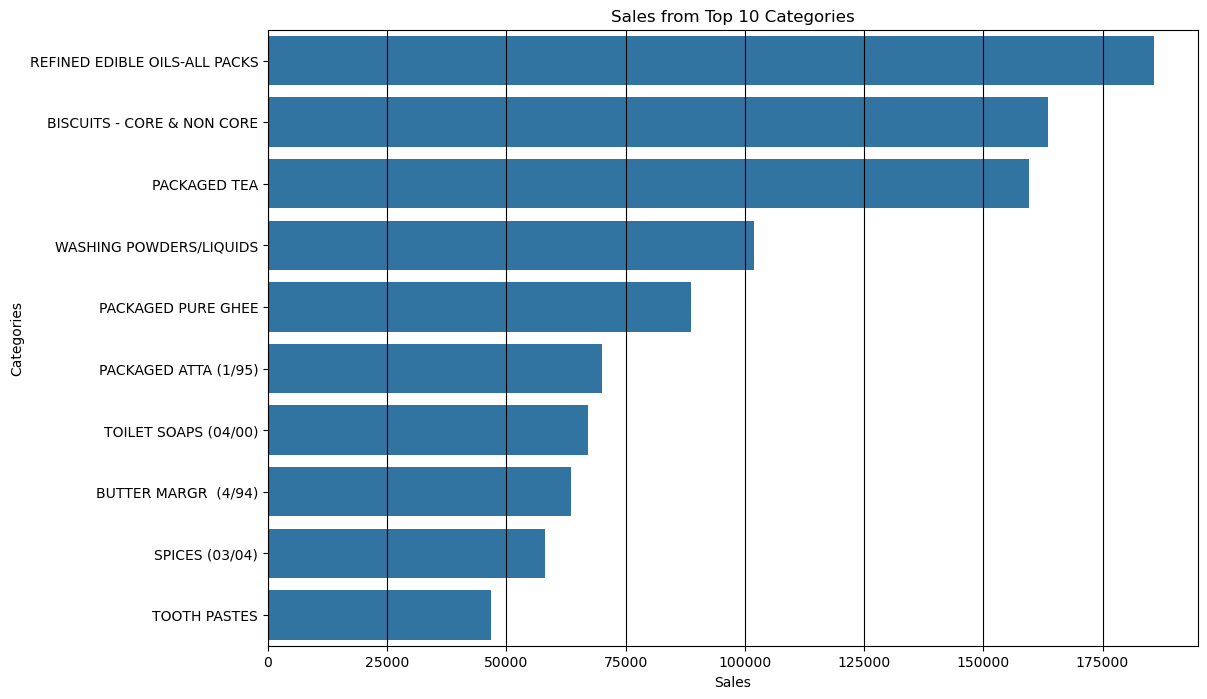

In [31]:
top_items_sales = df.groupby('GRP').sum().sort_values("VALUE",ascending=False)[['QTY','PRICE','VALUE']][0:10]
plt.figure(figsize=(12,8))
sns.barplot(x='VALUE',y=top_items_sales.index,data=top_items_sales)
plt.title("Sales from Top 10 Categories")
plt.xlabel("Sales")
plt.ylabel("Categories")
plt.grid(axis='x',color='black');